In [3]:
import pandas as pd
df=pd.read_csv('Datasets/Mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,:1]
x.head()
y.head()

,battery_power
0,842
1,1021
2,563
3,615
4,1821


# Univariant Analysis

In [21]:
#Apply SelectKBest Algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_rank_features=ordered_rank_features.fit(x,y)

ordered_rank_features.scores_
#x.shape

array([3.11649468e+05, 5.48855219e+02, 4.76558521e+02, 5.38638207e+02,
       4.78828623e+03, 5.25488335e+02, 1.15088957e+04, 1.76948763e+02,
       9.41850719e+03, 1.26835737e+03, 4.13789531e+03, 3.32970012e+05,
       1.59959833e+05, 6.18132976e+05, 1.55364635e+03, 3.52834900e+03,
       3.01644035e+03, 2.66494419e+02, 5.51455268e+02, 5.25480605e+02])

In [30]:
ordered_rank=pd.DataFrame(ordered_rank_features.scores_)
ordered_rank['features']=x.columns
feature_rank=ordered_rank
feature_rank.columns=['Score','Features']
feature_rank

,Score,Features
0,311649.467744,battery_power
1,548.855219,blue
2,476.558521,clock_speed
3,538.638207,dual_sim
4,4788.286228,fc
5,525.488335,four_g
6,11508.895683,int_memory
7,176.948763,m_dep
8,9418.507188,mobile_wt
9,1268.357372,n_cores


In [32]:
feature_rank.nlargest(10,'Score')

,Score,Features
13,618132.975622,ram
11,332970.011800,px_height
0,311649.467744,battery_power
12,159959.833194,px_width
6,11508.895683,int_memory
8,9418.507188,mobile_wt
4,4788.286228,fc
10,4137.895309,pc
15,3528.348997,sc_w
16,3016.440348,talk_time


# Feature Importance

This technique gives you a score for each feature of your data,the higher the score more relavent it is

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [35]:
print(model.feature_importances_)

[0.08255153 0.0241372  0.05870112 0.02697439 0.05559639 0.02284481
 0.06196672 0.05561502 0.061185   0.05601958 0.06000968 0.06217675
 0.06332855 0.06222377 0.05804359 0.05868585 0.05897673 0.01774373
 0.02302076 0.03019882]


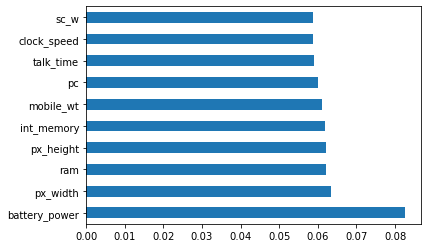

In [37]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')

# Correlation

Correlation between independent features.Omit dependent feature.

In [39]:
import seaborn as sns
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


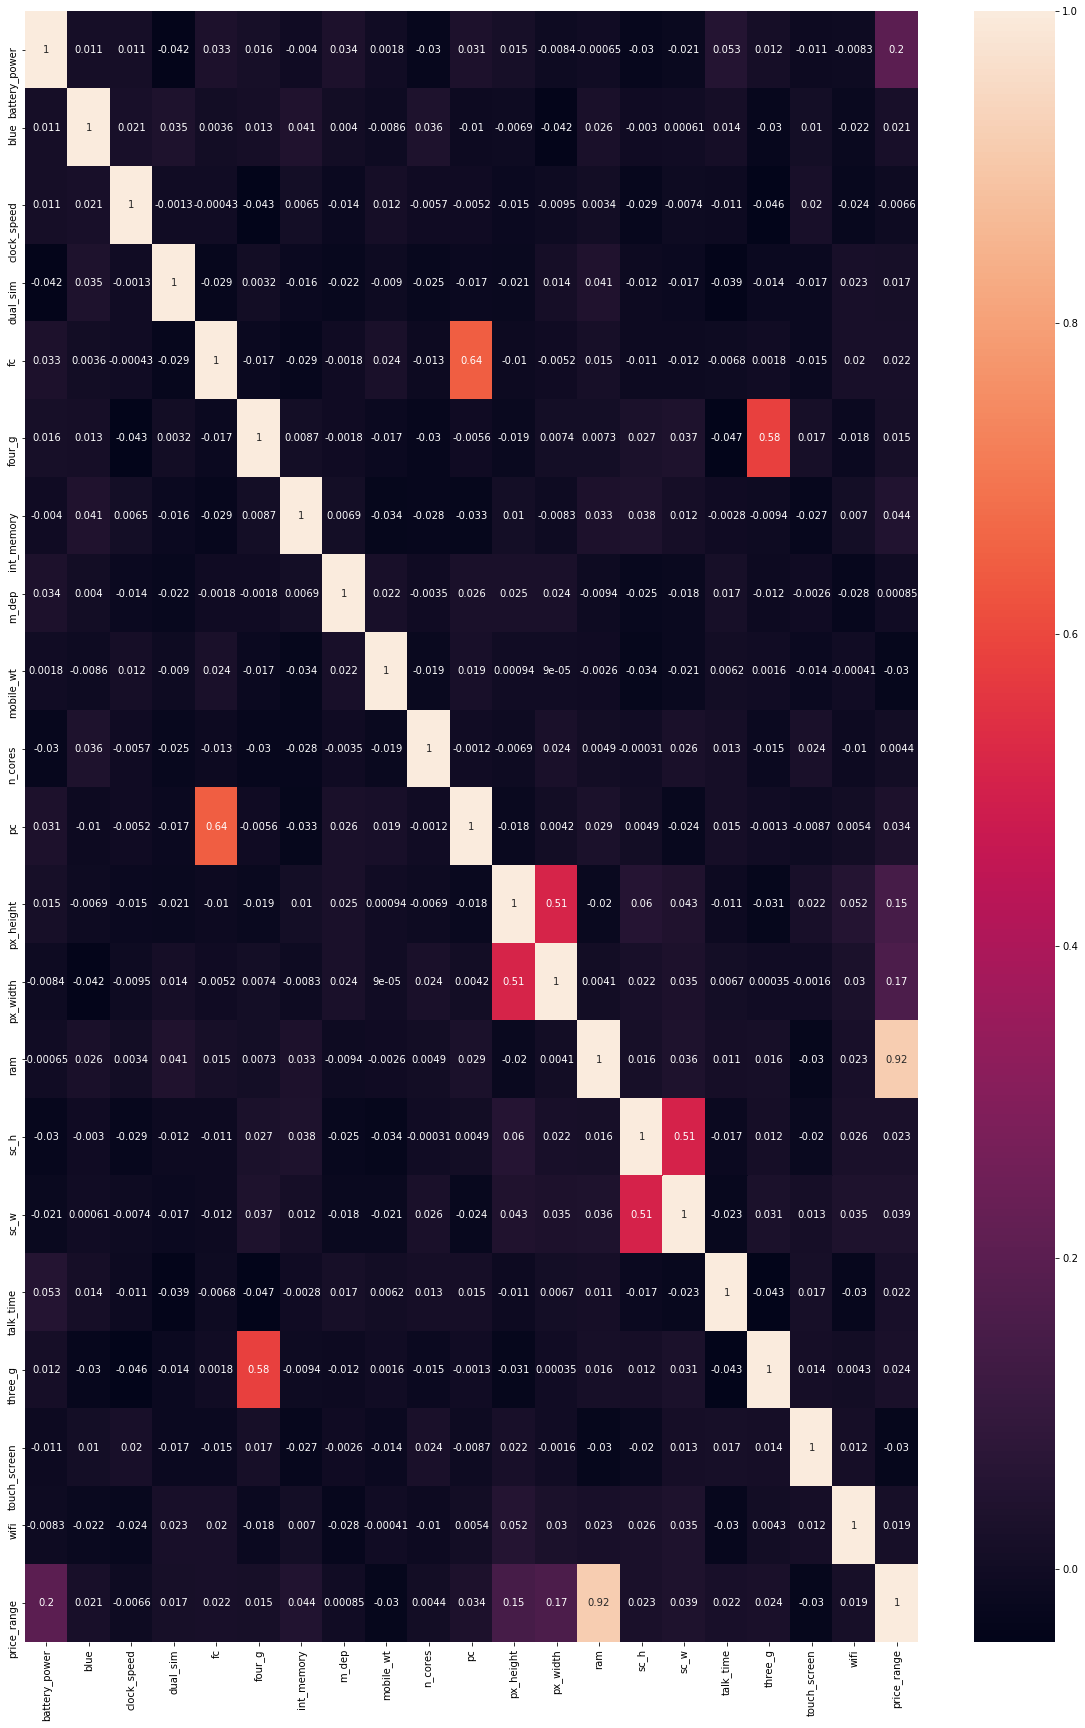

In [42]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True)

In [85]:
## Remove the correlated features
threshold=0.5

## Find and remove correlated features among independent features (not including dependendt feature(target))
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    #print(corr_matrix)
    print("columns:",corr_matrix.columns)
    print("length:",len(corr_matrix.columns))
    for i in range(len(corr_matrix.columns)):
        #print("i:",i)
        for j in range(i):            
            #print("j:",j)
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [99]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [86]:
correlation(df.iloc[:,:-1],threshold)

columns: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
length: 20


{'pc', 'px_width', 'sc_w', 'three_g'}

# Information Gain
Correlation with respect to Dependent varaible

In [100]:
from sklearn.feature_selection import mutual_info_classif

In [101]:
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


battery_power    6.674196
three_g          2.924406
four_g           1.086119
dual_sim         1.063721
blue             1.002185
touch_screen     0.989706
wifi             0.962548
m_dep            0.228821
n_cores          0.190008
sc_h             0.110448
fc               0.100676
clock_speed      0.099850
pc               0.083515
int_memory       0.071333
ram              0.047403
talk_time        0.035421
px_width         0.024763
px_height        0.022689
sc_w             0.017876
mobile_wt        0.000000
dtype: float64